In [79]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sentimental-analysis-for-tweets/sentiment_tweets3.csv


In [80]:
df=pd.read_csv('/kaggle/input/sentimental-analysis-for-tweets/sentiment_tweets3.csv')

In [81]:
df.shape

(10314, 3)

In [82]:
df.head()

,Index,message to examine,label (depression result)
0,106,just had a real good moment. i missssssssss hi...,0
1,217,is reading manga http://plurk.com/p/mzp1e,0
2,220,@comeagainjen http://twitpic.com/2y2lx - http:...,0
3,288,@lapcat Need to send 'em to my accountant tomo...,0
4,540,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0


In [83]:
df.tail()

,Index,message to examine,label (depression result)
10309,802309,No Depression by G Herbo is my mood from now o...,1
10310,802310,What do you do when depression succumbs the br...,1
10311,802311,Ketamine Nasal Spray Shows Promise Against Dep...,1
10312,802312,dont mistake a bad day with depression! everyo...,1
10313,802313,0,1


## **Exploratory Data Analysis(EDA)**

In [84]:
df['label (depression result)'].unique()

array([0, 1])

In [85]:
df.isnull().sum()

Index                        0
message to examine           0
label (depression result)    0
dtype: int64

In [86]:
## If You don't have install 
# !pip install -U ydata-profiling

In [87]:
from ydata_profiling import ProfileReport
import warnings
warnings.filterwarnings('ignore')

In [88]:
profile = ProfileReport(df, title="DataSet's Report")

In [89]:
profile.to_widgets()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

## 1. Text Preprocessing

In [90]:
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer

ps=PorterStemmer()
wordnet=WordNetLemmatizer()

In [91]:
## Only extracting the text 
def extracted_text(text):
    words = re.findall('[A-Za-z]+', text)
    extracted = ' '.join([word.lower() for word in words])
    return extracted

In [92]:
df['message to examine']=df['message to examine'].apply(extracted_text)

In [93]:
df['message to examine']

0        just had a real good moment i missssssssss him...
1                  is reading manga http plurk com p mzp e
2        comeagainjen http twitpic com y lx http www yo...
3        lapcat need to send em to my accountant tomorr...
4                add me on myspace myspace com lookthunder
                               ...                        
10309    no depression by g herbo is my mood from now o...
10310    what do you do when depression succumbs the br...
10311    ketamine nasal spray shows promise against dep...
10312    dont mistake a bad day with depression everyon...
10313                                                     
Name: message to examine, Length: 10314, dtype: object

In [94]:
## Removing the Stopwords
corpus=[]
def preprocess(text):
    review = text.lower()
    review = review.split()
    review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
    review = ' '.join(review)
    return corpus.append(review)

In [95]:
df['message to examine'].apply(preprocess)

0        None
1        None
2        None
3        None
4        None
         ... 
10309    None
10310    None
10311    None
10312    None
10313    None
Name: message to examine, Length: 10314, dtype: object

In [96]:
corpus[:5]

['real good moment missssssssss much',
 'read manga http plurk com p mzp e',
 'comeagainjen http twitpic com lx http www youtub com watch v zogfqvh',
 'lapcat need send em account tomorrow oddli even refer tax support evid though',
 'add myspac myspac com lookthund']

In [135]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
import pickle as pkl

In [98]:
cv=CountVectorizer(max_features=5000,analyzer='word')

In [138]:
with open("CountVectors.pkl", "wb") as file:
    pkl.dump(cv, file)

In [99]:
X=cv.fit_transform(corpus).toarray()

In [100]:
y=df['label (depression result)']

In [101]:
y.sample(5)

4932    0
5780    0
3750    0
2510    0
8736    1
Name: label (depression result), dtype: int64

In [155]:
## importing the requires libraries for models training 
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB,BernoulliNB
from sklearn.ensemble import VotingClassifier,BaggingClassifier,StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
##Evaluations metrics 
from sklearn.metrics import accuracy_score,ConfusionMatrixDisplay,confusion_matrix,classification_report

import matplotlib.pyplot as plt 
import seaborn as sns

In [103]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [104]:
stc=StandardScaler()

In [105]:
X_train_scaled=stc.fit_transform(X_train)
X_test_scaled=stc.transform(X_test)

In [106]:
X_train_scaled

array([[-0.01177041, -0.01579254, -0.01177041, ..., -0.01488914,
        -0.02038977, -0.01664703],
       [-0.01177041, -0.01579254, -0.01177041, ..., -0.01488914,
        -0.02038977, -0.01664703],
       [-0.01177041, -0.01579254, -0.01177041, ..., -0.01488914,
        -0.02038977, -0.01664703],
       ...,
       [-0.01177041, -0.01579254, -0.01177041, ..., -0.01488914,
        -0.02038977, -0.01664703],
       [-0.01177041, -0.01579254, -0.01177041, ..., -0.01488914,
        -0.02038977, -0.01664703],
       [-0.01177041, -0.01579254, -0.01177041, ..., -0.01488914,
        -0.02038977, -0.01664703]])

In [107]:
gnb=GaussianNB()
bnb=BernoulliNB()

In [108]:
gnb.fit(X_train_scaled,y_train)

GaussianNB()

In [109]:
y_pred_gnb=gnb.predict(X_test_scaled)

In [110]:
print("Score on Testing data:- ",accuracy_score(y_test,y_pred_gnb))

Score on Testing data:-  0.5873990306946688


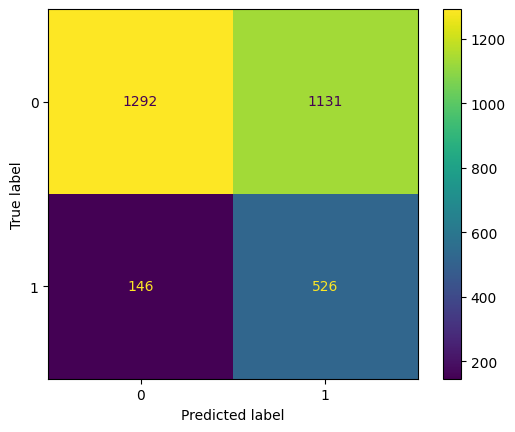

In [111]:
ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred_gnb)).plot()
plt.show()

In [156]:
print(classification_report(y_test,y_pred_gnb))

              precision    recall  f1-score   support

           0       0.90      0.53      0.67      2423
           1       0.32      0.78      0.45       672

    accuracy                           0.59      3095
   macro avg       0.61      0.66      0.56      3095
weighted avg       0.77      0.59      0.62      3095



In [112]:
bnb.fit(X_train_scaled,y_train)

BernoulliNB()

In [113]:
y_pred_bnb=bnb.predict(X_test_scaled)

In [114]:
accuracy_score(y_test,y_pred_bnb)

0.9893376413570275

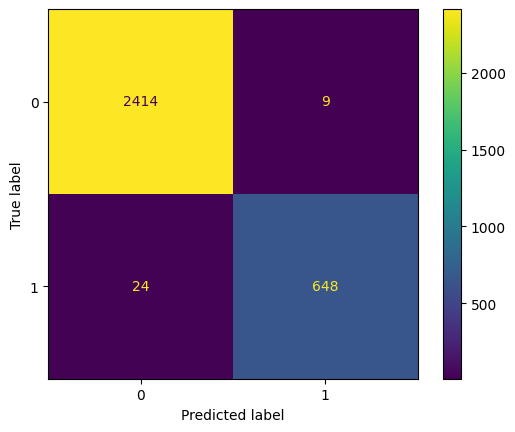

In [115]:
ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred_bnb)).plot()
plt.show()

In [157]:
print(classification_report(y_test,y_pred_bnb))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2423
           1       0.99      0.96      0.98       672

    accuracy                           0.99      3095
   macro avg       0.99      0.98      0.98      3095
weighted avg       0.99      0.99      0.99      3095



In [117]:
bgg_bnb=BaggingClassifier(estimator=bnb)

In [118]:
bgg_bnb.fit(X_train_scaled,y_train)

BaggingClassifier(estimator=BernoulliNB())

In [119]:
y_pred_bgg=bgg_bnb.predict(X_test_scaled)

In [120]:
accuracy_score(y_test,y_pred_bgg)

0.9890145395799677

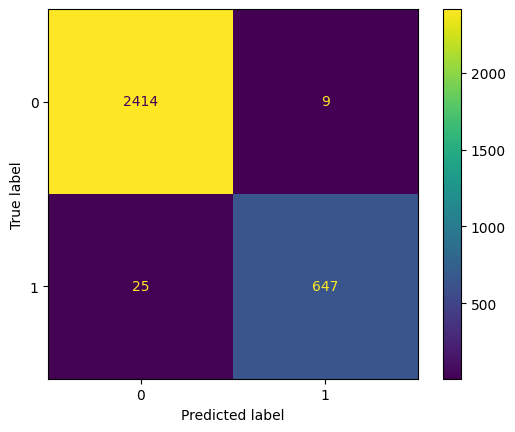

In [122]:
ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred_bgg)).plot()
plt.show()

In [158]:
print(classification_report(y_test,y_pred_bgg))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2423
           1       0.99      0.96      0.97       672

    accuracy                           0.99      3095
   macro avg       0.99      0.98      0.98      3095
weighted avg       0.99      0.99      0.99      3095



In [123]:
lgs=LogisticRegression()

In [124]:
lgs.fit(X_train_scaled,y_train)

LogisticRegression()

In [125]:
y_pred_lgs=lgs.predict(X_test_scaled)

In [126]:
accuracy_score(y_test,y_pred_lgs)

0.9809369951534733

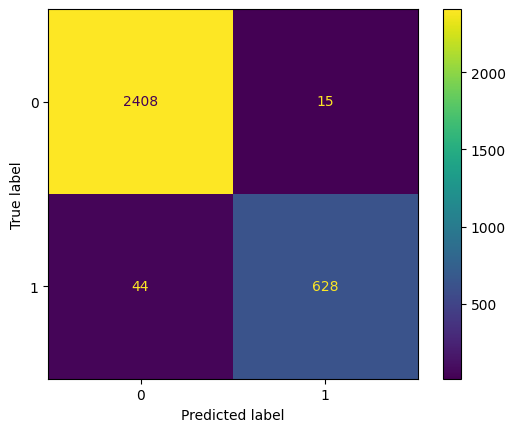

In [127]:
ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred_lgs)).plot()
plt.show()

In [159]:
print(classification_report(y_test,y_pred_lgs))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      2423
           1       0.98      0.93      0.96       672

    accuracy                           0.98      3095
   macro avg       0.98      0.96      0.97      3095
weighted avg       0.98      0.98      0.98      3095



In [130]:
vc=VotingClassifier(estimators=[('lgs',lgs),('bnb',bnb)])

In [131]:
vc.fit(X_train_scaled,y_train)

VotingClassifier(estimators=[('lgs', LogisticRegression()),
                             ('bnb', BernoulliNB())])

In [132]:
y_pred_vc=vc.predict(X_test_scaled)

In [133]:
accuracy_score(y_test,y_pred_vc)

0.9815831987075929

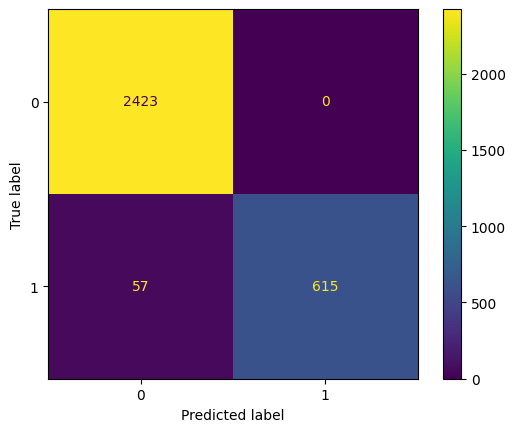

In [134]:
ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred_vc)).plot()
plt.show()

In [160]:
print(classification_report(y_test,y_pred_vc))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      2423
           1       1.00      0.92      0.96       672

    accuracy                           0.98      3095
   macro avg       0.99      0.96      0.97      3095
weighted avg       0.98      0.98      0.98      3095



In [150]:
sttc=StackingClassifier(estimators=[('bnb',BernoulliNB()),('lgs',LogisticRegression())],final_estimator=LogisticRegression())

In [151]:
sttc.fit(X_train_scaled,y_train)

StackingClassifier(estimators=[('bnb', BernoulliNB()),
                               ('lgs', LogisticRegression())],
                   final_estimator=LogisticRegression())

In [152]:
y_pred_sttc=sttc.predict(X_test_scaled)

In [153]:
accuracy_score(y_test,y_pred_sttc)

0.9922455573505654

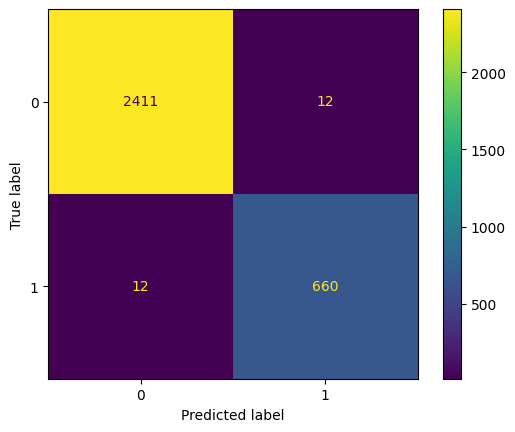

In [154]:
ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred_sttc)).plot()
plt.show()

In [161]:
print(classification_report(y_test,y_pred_sttc))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2423
           1       0.98      0.98      0.98       672

    accuracy                           0.99      3095
   macro avg       0.99      0.99      0.99      3095
weighted avg       0.99      0.99      0.99      3095



In [163]:
with open("Stacking_sentimnente.pkl", "wb") as file:
    pkl.dump(sttc, file)

## Sample Test

In [162]:
df.sample(3)

,Index,message to examine,label (depression result)
240,26724,watching the idnhu vid,0
674,70565,marshallkarp ps wasn t me blame mrs westwick t...,0
4926,494394,ok the inevitable happened t rex led to bowie ...,0


In [164]:
model=pkl.load(open('Stacking_sentimnente.pkl','rb'))

In [168]:
sent=["watching the idnhu vid"]
input_model=cv.transform(sent).toarray()

In [169]:
model.predict(input_model)

array([0])